# **Importing necessary Libraries**

In [2]:
# Importing all the libraries used for Data Analysis and Data Visualization.
# Importing OS to call the files used for training and validating the model.

import matplotlib.pyplot as plt
import numpy as np

In [3]:
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries that are used for building the CNN Model.

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

2022-11-10 11:59:40.365784: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-10 11:59:40.462439: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib
2022-11-10 11:59:40.462460: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-10 11:59:40.482101: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-10 11:59:40.946212: W 

 # **Displaying Images**

In [4]:
# Size of the image is standardized to maintain proper propotionate size of image. 

picture_size = 48
folder_path = "face-expression-recognition-dataset/images/"

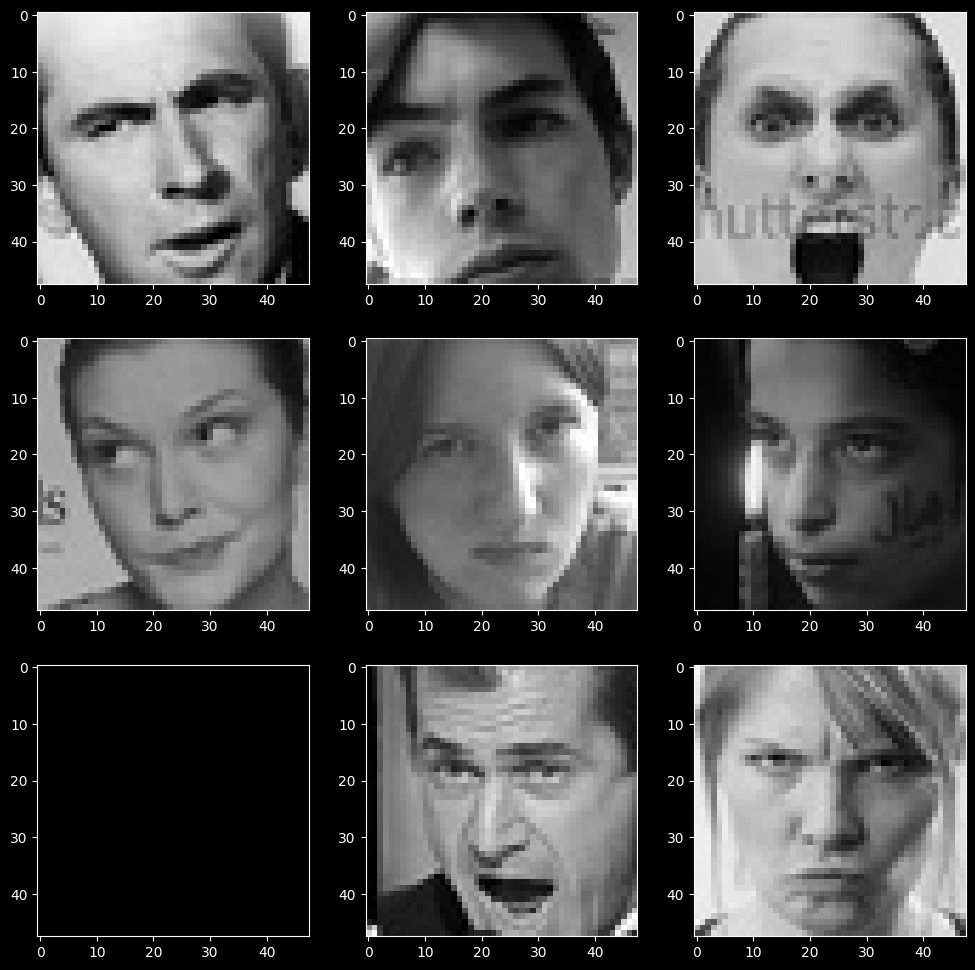

In [5]:
# Plotting some of the images from the 'Angry' Class.
expression = 'angry'
plt.style.use('dark_background')
# Defining figure size of the matplotlib graph.

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   #Function used to show images using matplotlib
plt.show()

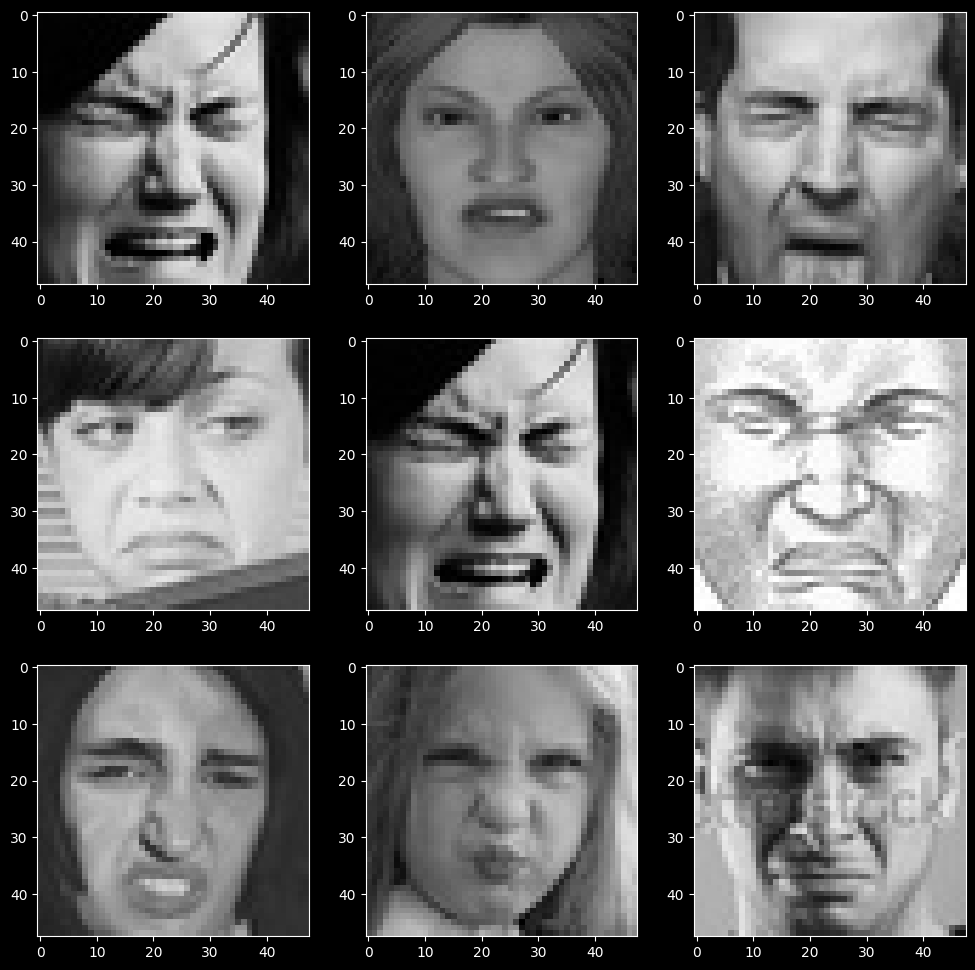

In [6]:
# Plotting some of the images from the 'Disgust' Class.
expression = 'disgust'
plt.style.use('dark_background')
# Defining figure size of the matplotlib graph. 

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img) #Function used to show images using matplotlib
plt.show()

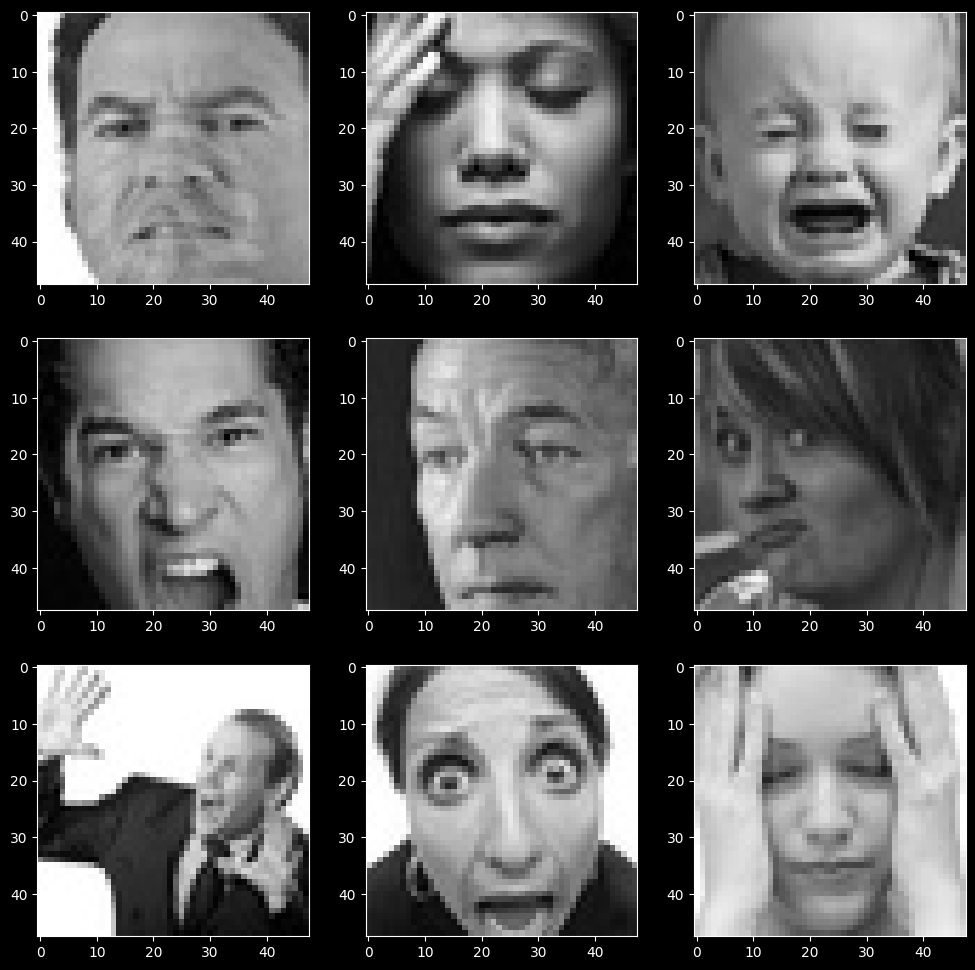

In [7]:
# Plotting some of the images from the 'Fear' Class.
expression = 'fear'
plt.style.use('dark_background')
# Defining figure size of the matplotlib graph.

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

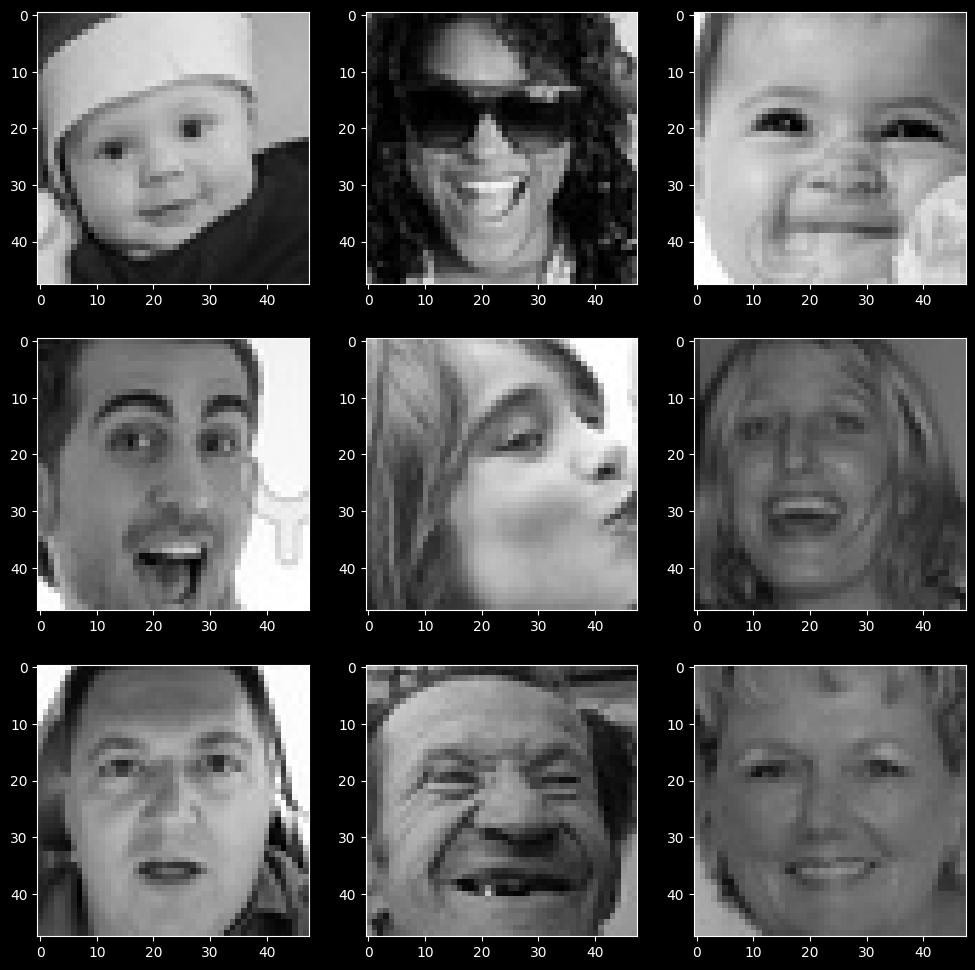

In [8]:
# Plotting some of the images from the 'Happy' Class.
expression = 'happy'
plt.style.use('dark_background')
# Defining figure size of the matplotlib graph.

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   #Function used to show images using matplotlib
plt.show()

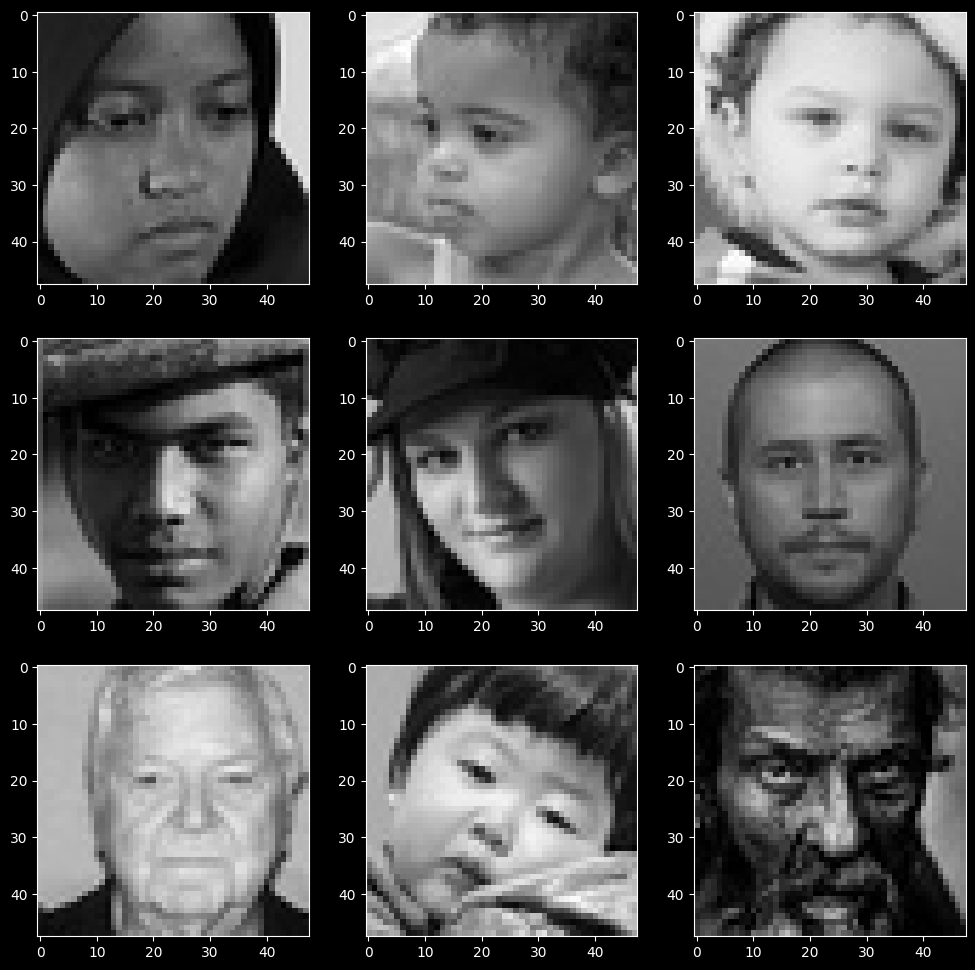

In [9]:
# Plotting some of the images from the 'Neutral' Class.
expression = 'neutral'
plt.style.use('dark_background')
# Defining figure size of the matplotlib graph.

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   #Function used to show images using matplotlib
plt.show()

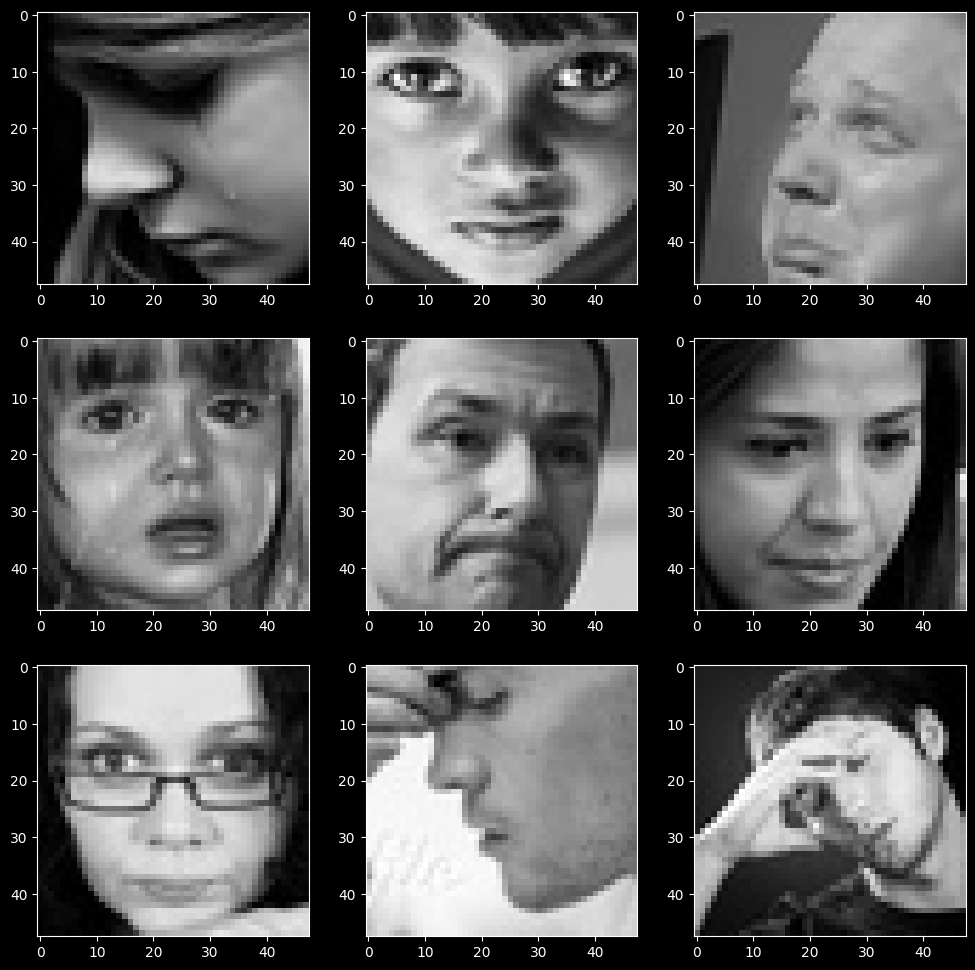

In [10]:
# Plotting some of the images from the 'Sad' Class.
expression = 'sad'
plt.style.use('dark_background')
# Defining figure size of the matplotlib graph.

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   #Function used to show images using matplotlib
plt.show()

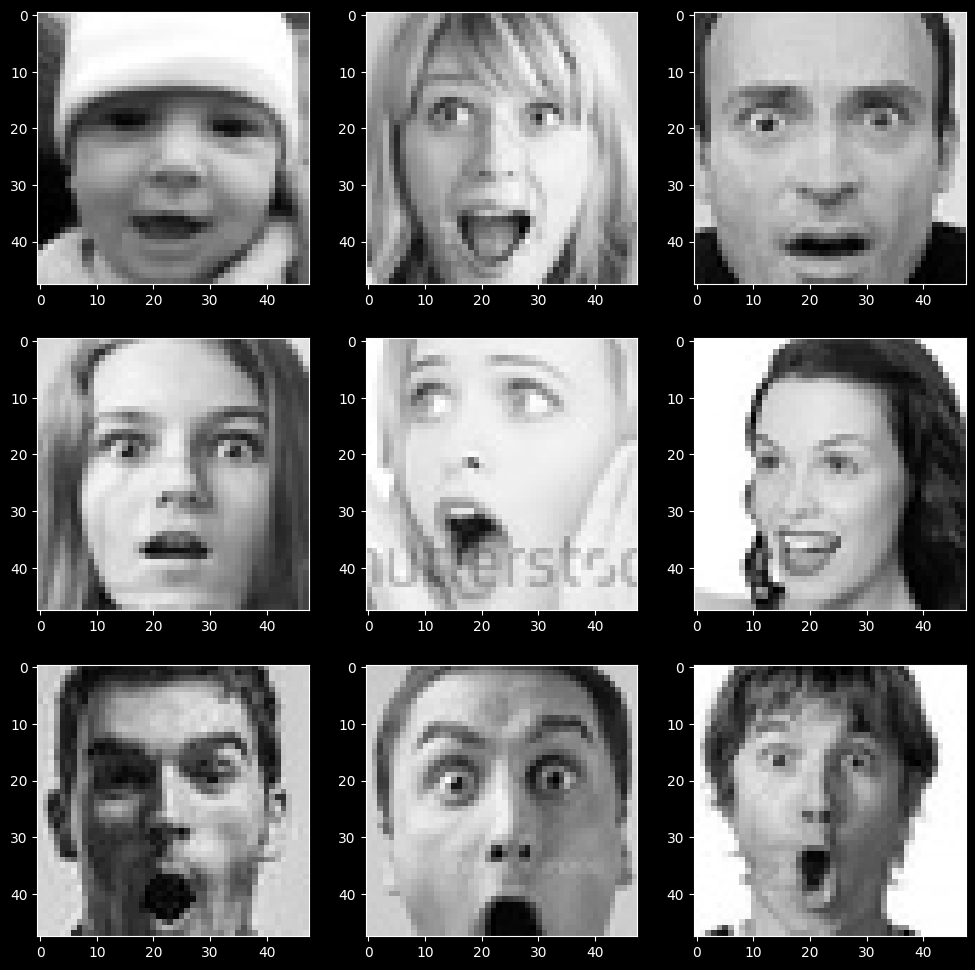

In [11]:
# Plotting some of the images from the 'Surprise' Class.
expression = 'surprise'
plt.style.use('dark_background')
# Defining figure size of the matplotlib graph.

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   #Function used to show images using matplotlib
plt.show()

# **Building the Validation Data**

In [12]:
# Batch size is used to know how much training example the model should take in one iteration. 

batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# **Building the CNN Model**

In [13]:
no_of_classes=7

model=Sequential()

#First Convulational Neural Network Layer
model.add(Conv2D(64,(3,3),padding="same",input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation("relu")) #Rectifier linear is defined because all the neurons aren't triggered at the same time. 
model.add(MaxPooling2D(pool_size=(2,2)))  #Extracts important information from ROI
model.add(Dropout(0.25))  #Used for preventing our model to get overfitted. 


#Second Convulational Neural Network Layer
model.add(Conv2D(128,(5,5),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Third Convulational Neural Network Layer
model.add(Conv2D(512,(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Fourth Convulational Neural Network Layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) #Collapse all the input data to 1 Dimensional Array 

#Fully connected First Layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected Second Layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes,activation="softmax"))

opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


2022-11-10 12:00:20.306185: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib
2022-11-10 12:00:20.328283: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-10 12:00:20.328434: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (unmanned-arena): /proc/driver/nvidia/version does not exist
2022-11-10 12:00:20.353149: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

# **Fitting the Model with the Training and the Validation Dataset**

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True #restoring the best model
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [19]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/48
225/225 [==============================] - 410s 2s/step - loss: 1.7403 - accuracy: 0.3347 - val_loss: 1.5773 - val_accuracy: 0.3773 - lr: 0.0010
Epoch 2/48
225/225 [==============================] - 494s 2s/step - loss: 1.4219 - accuracy: 0.4571 - val_loss: 1.3904 - val_accuracy: 0.4497 - lr: 0.0010
Epoch 3/48
225/225 [==============================] - 415s 2s/step - loss: 1.2694 - accuracy: 0.5150 - val_loss: 1.4204 - val_accuracy: 0.4635 - lr: 0.0010
Epoch 4/48
225/225 [==============================] - 349s 2s/step - loss: 1.1852 - accuracy: 0.5473 - val_loss: 1.1524 - val_accuracy: 0.5587 - lr: 0.0010
Epoch 5/48
225/225 [==============================] - 361s 2s/step - loss: 1.1233 - accuracy: 0.5723 - val_loss: 1.1720 - val_accuracy: 0.5474 - lr: 0.0010
Epoch 6/48
225/225 [==============================] - 368s 2s/step - loss: 1.0730 - accuracy: 0.5941 - val_loss: 1.1495 - val_accuracy: 0.5672 - lr: 0.0010
Epoch 7/48
225/225 [==============================] - 402s 2s/st

In [22]:
model.save('face_emotion_model.h5')

# **Plotting Accuracy & Loss**

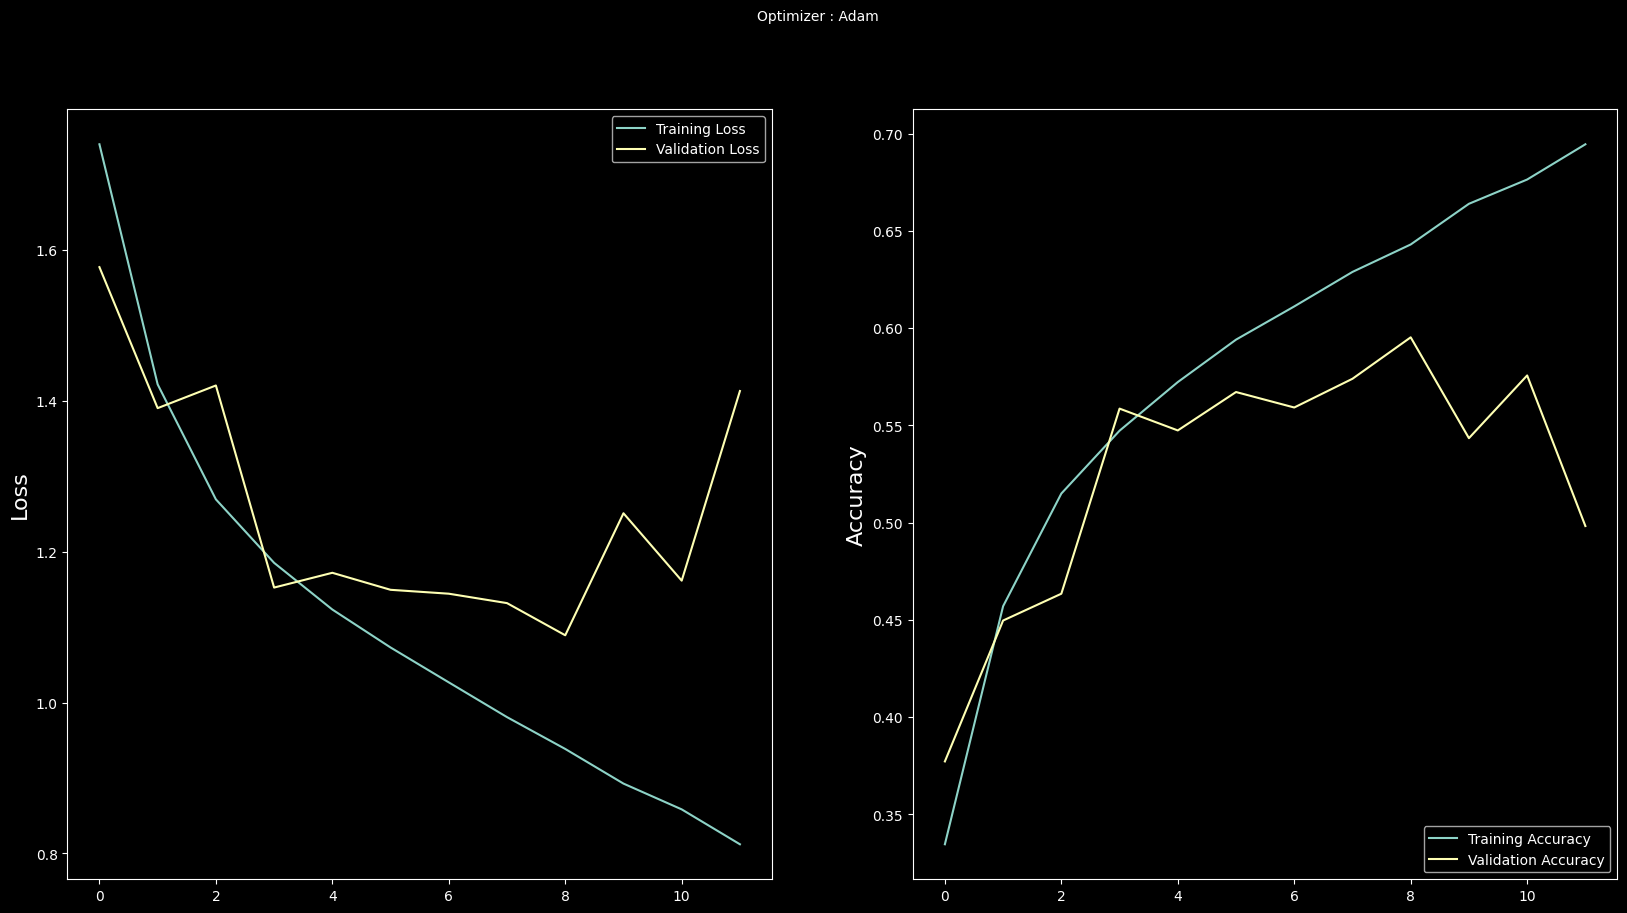

In [21]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()